# PROBLEM SET 1: QUANTITATIVE MACROECONOMICS JORGE BATANERO

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import os

In [213]:
os.chdir("C:/Users/jorge/Desktop/IDEA II/Quantitative Macro/PS1/DATA")

In [113]:
data = pd.read_csv("Data_1.txt")

In [114]:
data.head(100)

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,ASECWTH,PERNUM,WTFINL,CPSIDP,...,SEX,RACE,EMPSTAT,OCC,IND,CLASSWKR,AHRSWORKT,WHYUNEMP,EDUC,EARNWEEK
0,2018,1,1,1490.5890,20161000000100,NaN,NaN,1,2158.9491,20161000000101,...,1,100,32,0,0,0,999,0,92,9999.99
1,2018,1,1,1490.5890,20161000000100,NaN,NaN,2,1490.5890,20161000000102,...,2,100,36,0,0,0,999,0,81,9999.99
2,2018,2,1,1609.4899,20161200000200,NaN,NaN,1,1420.7457,20161200000201,...,1,100,10,9140,7580,22,55,0,81,9999.99
3,2018,2,1,1609.4899,20161200000200,NaN,NaN,2,1609.4899,20161200000202,...,2,100,36,0,0,0,999,0,81,9999.99
4,2018,3,1,1797.0408,20180100000300,NaN,NaN,1,2053.2749,20180100000301,...,1,100,10,4920,7070,13,10,0,111,9999.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018,73,1,1781.0527,20171000007400,NaN,NaN,1,2067.3970,20171000007401,...,1,100,10,1020,7460,22,40,0,111,1923.07
96,2018,73,1,1781.0527,20171000007400,NaN,NaN,2,1781.0527,20171000007402,...,2,100,10,5920,8180,22,20,0,111,961.53
97,2018,73,1,1781.0527,20171000007400,NaN,NaN,3,3361.8631,20171000007403,...,2,100,0,0,0,0,999,0,1,9999.99
98,2018,73,1,1781.0527,20171000007400,NaN,NaN,4,2283.7345,20171000007404,...,1,100,0,0,0,0,999,0,1,9999.99


# Employment Rate

In [115]:
dates = pd.Series(pd.date_range(start='2018/01/01', periods=32, freq='M'))
dates

0    2018-01-31
1    2018-02-28
2    2018-03-31
3    2018-04-30
4    2018-05-31
5    2018-06-30
6    2018-07-31
7    2018-08-31
8    2018-09-30
9    2018-10-31
10   2018-11-30
11   2018-12-31
12   2019-01-31
13   2019-02-28
14   2019-03-31
15   2019-04-30
16   2019-05-31
17   2019-06-30
18   2019-07-31
19   2019-08-31
20   2019-09-30
21   2019-10-31
22   2019-11-30
23   2019-12-31
24   2020-01-31
25   2020-02-29
26   2020-03-31
27   2020-04-30
28   2020-05-31
29   2020-06-30
30   2020-07-31
31   2020-08-31
dtype: datetime64[ns]

In [116]:
data.head()

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,ASECWTH,PERNUM,WTFINL,CPSIDP,...,SEX,RACE,EMPSTAT,OCC,IND,CLASSWKR,AHRSWORKT,WHYUNEMP,EDUC,EARNWEEK
0,2018,1,1,1490.5890,20161000000100,NaN,NaN,1,2158.9491,20161000000101,...,1,100,32,0,0,0,999,0,92,9999.99
1,2018,1,1,1490.5890,20161000000100,NaN,NaN,2,1490.5890,20161000000102,...,2,100,36,0,0,0,999,0,81,9999.99
2,2018,2,1,1609.4899,20161200000200,NaN,NaN,1,1420.7457,20161200000201,...,1,100,10,9140,7580,22,55,0,81,9999.99
3,2018,2,1,1609.4899,20161200000200,NaN,NaN,2,1609.4899,20161200000202,...,2,100,36,0,0,0,999,0,81,9999.99
4,2018,3,1,1797.0408,20180100000300,NaN,NaN,1,2053.2749,20180100000301,...,1,100,10,4920,7070,13,10,0,111,9999.99


In [117]:
emp_key={
    10:1,
    12:1,
    21:0,
    22:0
}
educ_key={
    10:1,
    20:1,
    30:1,
    40:1,
    50:1,
    60:1,
    70:1,
    71:1,
    72:1,
    73:2,
    111:3,
    123:4,
    124:4,
    125:4
}

In [118]:
data["employed"]=data["EMPSTAT"].map(emp_key)
data["educ_2"]=data["EDUC"].map(educ_key)
data.head()

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,ASECWTH,PERNUM,WTFINL,CPSIDP,...,EMPSTAT,OCC,IND,CLASSWKR,AHRSWORKT,WHYUNEMP,EDUC,EARNWEEK,employed,educ_2
0,2018,1,1,1490.5890,20161000000100,NaN,NaN,1,2158.9491,20161000000101,...,32,0,0,0,999,0,92,9999.99,NaN,NaN
1,2018,1,1,1490.5890,20161000000100,NaN,NaN,2,1490.5890,20161000000102,...,36,0,0,0,999,0,81,9999.99,NaN,NaN
2,2018,2,1,1609.4899,20161200000200,NaN,NaN,1,1420.7457,20161200000201,...,10,9140,7580,22,55,0,81,9999.99,1.0,NaN
3,2018,2,1,1609.4899,20161200000200,NaN,NaN,2,1609.4899,20161200000202,...,36,0,0,0,999,0,81,9999.99,NaN,NaN
4,2018,3,1,1797.0408,20180100000300,NaN,NaN,1,2053.2749,20180100000301,...,10,4920,7070,13,10,0,111,9999.99,1.0,3.0


In [119]:
employment_rate=data.groupby(["YEAR","MONTH"])["employed"].mean()
#employment_rate=employment_rate.reset_index
emp_rate = pd.DataFrame(employment_rate)
emp_rate["MONTH"]=[1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8]
emp_rate.head(34)

employed  MONTH
YEAR MONTH                 
2018 1      0.957213      1
     2      0.957776      2
     3      0.959487      3
     4      0.963294      4
     5      0.965605      5
     6      0.958818      6
     7      0.960257      7
     8      0.961766      8
     9      0.965068      9
     10     0.965879     10
     11     0.966113     11
     12     0.964489     12
2019 1      0.956942      1
     2      0.961240      2
     3      0.962573      3
     4      0.967533      4
     5      0.966654      5
     6      0.961934      6
     7      0.960976      7
     8      0.962698      8
     9      0.967074      9
     10     0.967856     10
     11     0.967613     11
     12     0.967252     12
2020 1      0.961908      1
     2      0.963234      2
     3      0.952362      3
     4      0.864187      4
     5      0.881650      5
     6      0.898387      6
     7      0.906796      7
     8      0.923099      8

In [120]:
emp_rate["Date"]=['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31']
emp_rate.head()

employed  MONTH        Date
YEAR MONTH                             
2018 1      0.957213      1  2018-01-31
     2      0.957776      2  2018-02-28
     3      0.959487      3  2018-03-31
     4      0.963294      4  2018-04-30
     5      0.965605      5  2018-05-31

In [121]:
employment_rate_educ=data.groupby(["YEAR","MONTH","educ_2"])["employed"].mean()
employment_rate_educ
emp_rate_educ = pd.DataFrame(employment_rate_educ)
emp_rate_educ.tail()

employed
YEAR MONTH educ_2          
2020 7     4.0     0.949314
     8     1.0     0.874482
           2.0     0.903985
           3.0     0.938287
           4.0     0.958619

In [122]:
emp_rate_educ["Levels"]=[1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4]
emp_rate_educ

employed  Levels
YEAR MONTH educ_2                  
2018 1     1.0     0.901694       1
           2.0     0.942226       2
           3.0     0.975154       3
           4.0     0.982492       4
     2     1.0     0.898389       1
...                     ...     ...
2020 7     4.0     0.949314       4
     8     1.0     0.874482       1
           2.0     0.903985       2
           3.0     0.938287       3
           4.0     0.958619       4

[128 rows x 2 columns]

In [14]:
monthly_dummies = pd.get_dummies(emp_rate['MONTH'])
monthly_dummies


1   2   3   4   5   6   7   8   9   10  11  12
YEAR MONTH                                                
2018 1       1   0   0   0   0   0   0   0   0   0   0   0
     2       0   1   0   0   0   0   0   0   0   0   0   0
     3       0   0   1   0   0   0   0   0   0   0   0   0
     4       0   0   0   1   0   0   0   0   0   0   0   0
     5       0   0   0   0   1   0   0   0   0   0   0   0
     6       0   0   0   0   0   1   0   0   0   0   0   0
     7       0   0   0   0   0   0   1   0   0   0   0   0
     8       0   0   0   0   0   0   0   1   0   0   0   0
     9       0   0   0   0   0   0   0   0   1   0   0   0
     10      0   0   0   0   0   0   0   0   0   1   0   0
     11      0   0   0   0   0   0   0   0   0   0   1   0
     12      0   0   0   0   0   0   0   0   0   0   0   1
2019 1       1   0   0   0   0   0   0   0   0   0   0   0
     2       0   1   0   0   0   0   0   0   0   0   0   0
     3       0   0   1   0   0   0   0   0   0   0   0   0
     4       0   0   0   1   0   0   0   0   0   0   0   0
     5       0   0   0   0   1   0   0   0   0   0   0   0
     6       0   0   0   0   0   1   0   0   0   0   0   0
     7       0   0   0   0   0   0   1   0   0   0   0   0
     8       0   0   0   0   0   0   0   1   0   0   0   0
     9       0   0   0   0   0   0   0   0   1   0   0   0
     10      0   0   0   0   0   0   0   0   0   1   0   0
     11      0   0   0   0   0   0   0   0   0   0   1   0
     12      0   0   0   0   0   0   0   0   0   0   0   1
2020 1       1   0   0   0   0   0   0   0   0   0   0   0
     2       0   1   0   0   0   0   0   0   0   0   0   0
     3       0   0   1   0   0   0   0   0   0   0   0   0
     4       0   0   0   1   0   0   0   0   0   0   0   0
     5       0   0   0   0   1   0   0   0   0   0   0   0
     6       0   0   0   0   0   1   0   0   0   0   0   0
     7       0   0   0   0   0   0   1   0   0   0   0   0
     8       0   0   0   0   0   0   0   1   0   0   0   0

In [15]:
#emp_rate["Date"] = dates
#emp_rate = emp_rate.set_index("Date")


In [16]:
#emp_rate.drop(["MONTH"], axis=1)
#emp_rate

In [17]:
model = LinearRegression()
model.fit(monthly_dummies[:-8], emp_rate["employed"][:-8])
predictions = model.predict(monthly_dummies[-8:])
predictions

array([0.95707771, 0.95950833, 0.96102996, 0.96541372, 0.96612909,
       0.96037604, 0.96061652, 0.96223173])

In [18]:
predicted_data = emp_rate["employed"][:-8]
predicted_data

YEAR  MONTH
2018  1        0.957213
      2        0.957776
      3        0.959487
      4        0.963294
      5        0.965605
      6        0.958818
      7        0.960257
      8        0.961766
      9        0.965068
      10       0.965879
      11       0.966113
      12       0.964489
2019  1        0.956942
      2        0.961240
      3        0.962573
      4        0.967533
      5        0.966654
      6        0.961934
      7        0.960976
      8        0.962698
      9        0.967074
      10       0.967856
      11       0.967613
      12       0.967252
Name: employed, dtype: float64

In [19]:
emp_rate_2 = emp_rate["employed"][:]
emp_rate_2

YEAR  MONTH
2018  1        0.957213
      2        0.957776
      3        0.959487
      4        0.963294
      5        0.965605
      6        0.958818
      7        0.960257
      8        0.961766
      9        0.965068
      10       0.965879
      11       0.966113
      12       0.964489
2019  1        0.956942
      2        0.961240
      3        0.962573
      4        0.967533
      5        0.966654
      6        0.961934
      7        0.960976
      8        0.962698
      9        0.967074
      10       0.967856
      11       0.967613
      12       0.967252
2020  1        0.961908
      2        0.963234
      3        0.952362
      4        0.864187
      5        0.881650
      6        0.898387
      7        0.906796
      8        0.923099
Name: employed, dtype: float64

In [20]:
emp_rate_2 = emp_rate_2.reset_index()
emp_rate_2["Date"]= dates
emp_rate_2

,YEAR,MONTH,employed,Date
0,2018,1,0.957213,2018-01-31
1,2018,2,0.957776,2018-02-28
2,2018,3,0.959487,2018-03-31
3,2018,4,0.963294,2018-04-30
4,2018,5,0.965605,2018-05-31
5,2018,6,0.958818,2018-06-30
6,2018,7,0.960257,2018-07-31
7,2018,8,0.961766,2018-08-31
8,2018,9,0.965068,2018-09-30
9,2018,10,0.965879,2018-10-31


In [21]:
predicted_data = pd.concat([predicted_data, pd.Series(predictions)])
predicted_data = predicted_data.reset_index()
predicted_data.head(32)
#predicted_dataframe = pd.DataFrame(predicted_data)
#predicted_dataframe

,index,0
0,"(2018, 1)",0.957213
1,"(2018, 2)",0.957776
2,"(2018, 3)",0.959487
3,"(2018, 4)",0.963294
4,"(2018, 5)",0.965605
5,"(2018, 6)",0.958818
6,"(2018, 7)",0.960257
7,"(2018, 8)",0.961766
8,"(2018, 9)",0.965068
9,"(2018, 10)",0.965879


In [22]:
predicted_data["Date"] = dates
#predicted_data = predicted_data.set_index("Date")
predicted_data

,index,0,Date
0,"(2018, 1)",0.957213,2018-01-31
1,"(2018, 2)",0.957776,2018-02-28
2,"(2018, 3)",0.959487,2018-03-31
3,"(2018, 4)",0.963294,2018-04-30
4,"(2018, 5)",0.965605,2018-05-31
5,"(2018, 6)",0.958818,2018-06-30
6,"(2018, 7)",0.960257,2018-07-31
7,"(2018, 8)",0.961766,2018-08-31
8,"(2018, 9)",0.965068,2018-09-30
9,"(2018, 10)",0.965879,2018-10-31


In [23]:
predicted_data.drop(["index"], axis=1)


,0,Date
0,0.957213,2018-01-31
1,0.957776,2018-02-28
2,0.959487,2018-03-31
3,0.963294,2018-04-30
4,0.965605,2018-05-31
5,0.958818,2018-06-30
6,0.960257,2018-07-31
7,0.961766,2018-08-31
8,0.965068,2018-09-30
9,0.965879,2018-10-31


In [26]:

#emp_rate_2.plot(x="Date", y="employed" ,linewidth=2.0, label ="Real" )
#plt.title("Employment Rate")
#ax.set_ylabel("Rate")
#predicted_data.plot(x="Date", y=0 ,linewidth=2.0, label ="Predicted")
#plt.title("Employment Rate")
#plt.ylim(0.86,1)
#lines = plt.plot(data, data, data, data**2)
#plt.setp(lines, color = "r", linewidth = 2.0)

[]

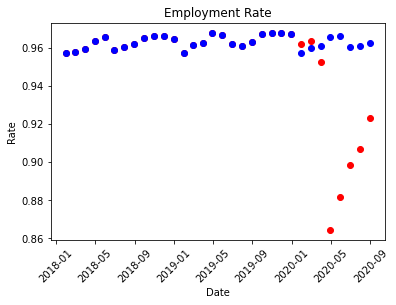

In [27]:
employed_2=emp_rate_2["employed"]
employed_2
predicition_2=predicted_data[0]
predicition_2
plt.plot(dates, employed_2, "ro", dates, predicition_2,"bo")
plt.title("Employment Rate")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.xticks(rotation=45)
#plt.xlim(np.linspace(dates['2018-01-31'], dates['2020-08-31'], 6))
#ax.set_xlabel("Date")
plt.plot()

In [28]:
type(predicition_2)

pandas.core.series.Series

In [29]:
type(employed_2)

pandas.core.series.Series

In [30]:
emp_rate_percentage = [100 * e1 / e2 - 100 for e1, e2 in zip(employed_2[1:], employed_2)]

In [31]:
#emp_educ_1=emp_rate_educ[emp_rate_educ["Levels"]==1]
#emp_educ_2=emp_rate_educ[emp_rate_educ["Levels"]==2]
#emp_educ_3=emp_rate_educ[emp_rate_educ["Levels"]==3]
#emp_educ_4=emp_rate_educ[emp_rate_educ["Levels"]==4]
#emp_educ_1=emp_educ_1["employed"]


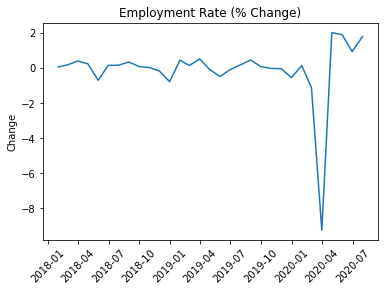

In [32]:
fix, ax = plt.subplots(facecolor="w")
ax.plot(dates[:-1], emp_rate_percentage)
plt.title("Employment Rate (% Change)")
ax.set_ylabel("Change")
plt.xticks(rotation=45)
plt.show()

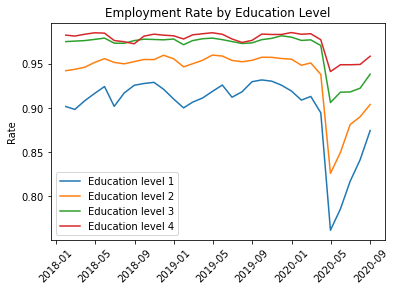

In [33]:
levels = [1, 2, 3, 4]
fig, ax = plt.subplots(facecolor="w")
for level in levels:
    edu_level = emp_rate_educ[emp_rate_educ["Levels"] == level]
    ax.plot(dates, edu_level["employed"], label=f"Education level {level}")
plt.xticks(rotation=45)
ax.set_ylabel("Rate")
plt.title("Employment Rate by Education Level")
plt.legend()
plt.show()

# Weekly Hours

In [241]:
av_hours = data[data["AHRSWORKT"]<999].groupby(["YEAR", "MONTH"])["AHRSWORKT"].mean()
av_hours.head()

YEAR  MONTH
2018  1        38.325433
      2        38.563947
      3        38.632416
      4        39.041750
      5        39.203406
Name: AHRSWORKT, dtype: float64

In [242]:
av_hours = av_hours.reset_index().drop(["YEAR", "MONTH"], axis=1)
av_hours.head()

,AHRSWORKT
0,38.325433
1,38.563947
2,38.632416
3,39.041750
4,39.203406


In [243]:
av_hours_educ = data[data["AHRSWORKT"]<999].groupby(["YEAR", "MONTH", "educ_2"])["AHRSWORKT"].mean()
av_hours_educ.head()

YEAR  MONTH  educ_2
2018  1      1.0       32.813214
             2.0       38.266347
             3.0       39.644856
             4.0       40.532433
      2      1.0       32.912025
Name: AHRSWORKT, dtype: float64

In [244]:
av_hours_educ = av_hours_educ.reset_index().drop(["YEAR", "MONTH"], axis=1)
av_hours_educ.head()

,educ_2,AHRSWORKT
0,1.0,32.813214
1,2.0,38.266347
2,3.0,39.644856
3,4.0,40.532433
4,1.0,32.912025


In [245]:
hours_model = LinearRegression()
hours_model.fit(monthly_dummies[:-8], av_hours["AHRSWORKT"][:-8])
hours_predictions = hours_model.predict(monthly_dummies[-8:])
hours_predictions

array([38.47796883, 38.49570787, 38.61899833, 38.94991043, 39.17224849,
       39.06211888, 38.99863293, 39.20281657])

In [246]:
hours_predictions = av_hours["AHRSWORKT"][:-8]
hours_predictions = pd.concat([hours_predictions, pd.Series(hours_predictions)])
hours_predictions = hours_predictions.reset_index()
hours_predictions = hours_predictions.drop(["index"], axis = 1)
hours_predictions["Date"] = dates

In [247]:
hours_predictions = hours_predictions.set_index("Date")
hours_predictions = hours_predictions["AHRSWORKT"][:-16]
hours_predictions

Date
2018-01-31    38.325433
2018-02-28    38.563947
2018-03-31    38.632416
2018-04-30    39.041750
2018-05-31    39.203406
2018-06-30    39.114754
2018-07-31    39.050064
2018-08-31    39.240244
2018-09-30    39.136456
2018-10-31    38.831020
2018-11-30    38.957916
2018-12-31    38.884491
2019-01-31    38.630505
2019-02-28    38.427469
2019-03-31    38.605580
2019-04-30    38.858071
2019-05-31    39.141091
2019-06-30    39.009484
2019-07-31    38.947202
2019-08-31    39.165389
2019-09-30    39.270366
2019-10-31    39.124595
2019-11-30    39.090261
2019-12-31    38.929675
2020-01-31    38.325433
2020-02-29    38.563947
2020-03-31    38.632416
2020-04-30    39.041750
2020-05-31    39.203406
2020-06-30    39.114754
2020-07-31    39.050064
2020-08-31    39.240244
Name: AHRSWORKT, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

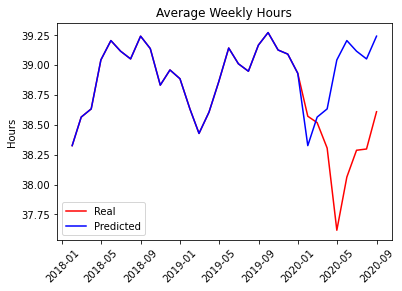

In [248]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates, av_hours, "r", label="Real")
ax.plot(dates, hours_predictions, "b", label="Predicted")
plt.title("Average Weekly Hours")
ax.set_ylabel("Hours")
plt.xticks(rotation=45)
plt.legend()
plt.show

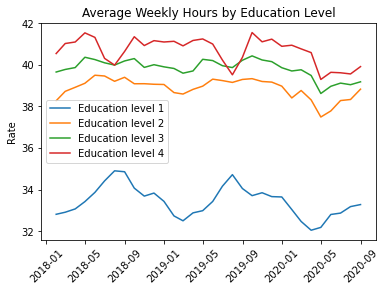

In [249]:
levels = [1, 2, 3, 4]
fig, ax = plt.subplots(facecolor="w")
for level in levels:
    edu_level_hrs = av_hours_educ[av_hours_educ["educ_2"] == level]
    ax.plot(dates, edu_level_hrs["AHRSWORKT"], label=f"Education level {level}")
plt.title("Average Weekly Hours by Education Level")
ax.set_ylabel("Rate")
plt.xticks(rotation=45)
plt.legend(loc=6)
plt.show()

# Worker Class

In [43]:
class_key={
    10 : 1,
    13 : 1,
    14 : 1,
    20 : 2,
    21 : 2,
    22 : 2,
    23 : 2,
    24 : 3,
    25 : 3,
    26 : 3,
    27 : 3,
    28 : 3
}

In [44]:
data["class_worker"]=data["CLASSWKR"].map(class_key)
data.head()

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,ASECWTH,PERNUM,WTFINL,CPSIDP,...,OCC,IND,CLASSWKR,AHRSWORKT,WHYUNEMP,EDUC,EARNWEEK,employed,educ_2,class_worker
0,2018,1,1,1490.5890,20161000000100,NaN,NaN,1,2158.9491,20161000000101,...,0,0,0,999,0,92,9999.99,NaN,NaN,NaN
1,2018,1,1,1490.5890,20161000000100,NaN,NaN,2,1490.5890,20161000000102,...,0,0,0,999,0,81,9999.99,NaN,NaN,NaN
2,2018,2,1,1609.4899,20161200000200,NaN,NaN,1,1420.7457,20161200000201,...,9140,7580,22,55,0,81,9999.99,1.0,NaN,2.0
3,2018,2,1,1609.4899,20161200000200,NaN,NaN,2,1609.4899,20161200000202,...,0,0,0,999,0,81,9999.99,NaN,NaN,NaN
4,2018,3,1,1797.0408,20180100000300,NaN,NaN,1,2053.2749,20180100000301,...,4920,7070,13,10,0,111,9999.99,1.0,3.0,1.0


In [45]:
employment_rate_class=data.groupby(["YEAR","MONTH","class_worker"])["employed"].mean()
emp_rate_class = pd.DataFrame(employment_rate_class)
emp_rate_class.head()

employed
YEAR MONTH class_worker          
2018 1     1.0           0.975595
           2.0           0.954823
           3.0           0.977123
     2     1.0           0.975721
           2.0           0.955077

In [46]:
emp_rate_class["Levels"]=[1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3,1,2,3]
emp_rate_class

employed  Levels
YEAR MONTH class_worker                  
2018 1     1.0           0.975595       1
           2.0           0.954823       2
           3.0           0.977123       3
     2     1.0           0.975721       1
           2.0           0.955077       2
...                           ...     ...
2020 7     2.0           0.901982       2
           3.0           0.922660       3
     8     1.0           0.960094       1
           2.0           0.916922       2
           3.0           0.947976       3

[96 rows x 2 columns]

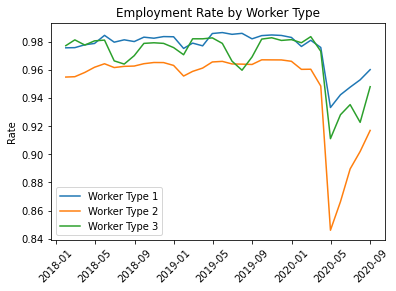

In [47]:
levels_class = [1, 2, 3]
fig, ax = plt.subplots(facecolor="w")
for level in levels_class:
    class_level = emp_rate_class[emp_rate_class["Levels"] == level]
    ax.plot(dates, class_level["employed"], label=f"Worker Type {level}")
plt.xticks(rotation=45)
ax.set_ylabel("Rate")
plt.title("Employment Rate by Worker Type")
plt.legend()
plt.show()

In [48]:
av_hours_class = data[data["AHRSWORKT"]<999].groupby(["YEAR", "MONTH", "class_worker"])["AHRSWORKT"].mean()
av_hours_class.head()

YEAR  MONTH  class_worker
2018  1      1.0             37.424036
             2.0             38.336651
             3.0             38.927189
      2      1.0             38.157325
             2.0             38.529362
Name: AHRSWORKT, dtype: float64

In [49]:
av_hours_class = av_hours_class.reset_index().drop(["YEAR", "MONTH"], axis=1)
av_hours_class.head()

,class_worker,AHRSWORKT
0,1.0,37.424036
1,2.0,38.336651
2,3.0,38.927189
3,1.0,38.157325
4,2.0,38.529362


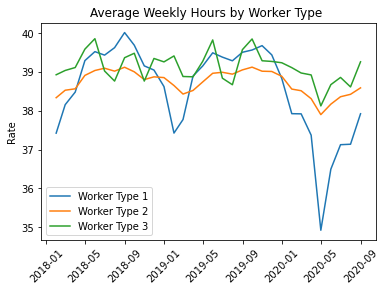

In [50]:
levels_class = [1, 2, 3]
fig, ax = plt.subplots(facecolor="w")
for level in levels_class:
    class_level_hrs = av_hours_class[av_hours_class["class_worker"] == level]
    ax.plot(dates, class_level_hrs["AHRSWORKT"], label=f"Worker Type {level}")
plt.title("Average Weekly Hours by Worker Type ")
ax.set_ylabel("Rate")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Earnings

In [51]:
earnings = data[data["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH"])["EARNWEEK"].mean()
earnings.head()

YEAR  MONTH
2018  1        957.690412
      2        967.938621
      3        966.631195
      4        966.875694
      5        959.129018
Name: EARNWEEK, dtype: float64

In [52]:
detrended_earings = [we2 - we1 for we2, we1 in zip(earnings[1:], earnings)] # Here I'm just taking first differences

In [53]:
earnings_educ = data[data["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH", "educ_2"])["EARNWEEK"].mean()
earnings_educ = earnings_educ.reset_index().drop(["YEAR", "MONTH"], axis=1)
earnings_educ.head()

,educ_2,EARNWEEK
0,1.0,487.580256
1,2.0,731.152785
2,3.0,1209.969704
3,4.0,1537.902528
4,1.0,487.643538


(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669.]),
 <a list of 9 Text major ticklabel objects>)

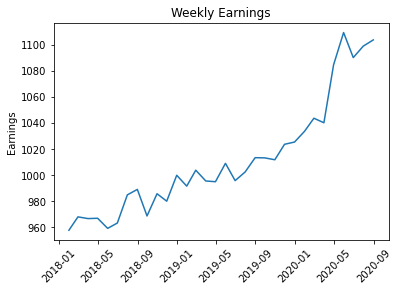

In [54]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates, data[data["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH"])["EARNWEEK"].mean())
plt.title("Weekly Earnings")
ax.set_ylabel("Earnings")
plt.xticks(rotation=45)

(array([736695., 736785., 736876., 736968., 737060., 737150., 737241.,
        737333., 737425., 737516., 737607.]),
 <a list of 11 Text major ticklabel objects>)

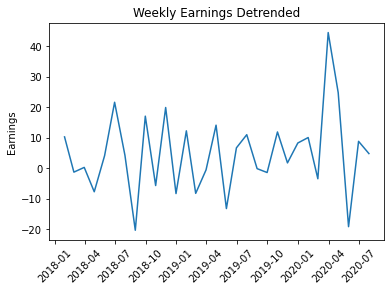

In [55]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates[:-1], detrended_earings)
plt.title("Weekly Earnings Detrended")
ax.set_ylabel("Earnings")
plt.xticks(rotation=45)

(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669.]),
 <a list of 9 Text major ticklabel objects>)

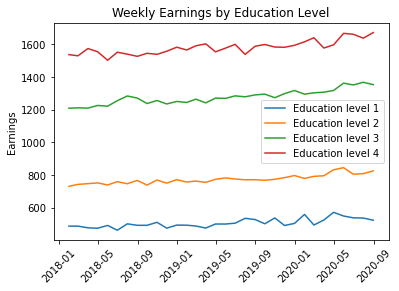

In [56]:
levels = [1, 2, 3, 4]
fig, ax = plt.subplots(facecolor="w")
for level in levels:
    edu_level_earnings = earnings_educ[earnings_educ["educ_2"] == level]
    ax.plot(dates, edu_level_earnings["EARNWEEK"], label=f"Education level {level}")
plt.legend()
plt.title("Weekly Earnings by Education Level")
ax.set_ylabel("Earnings")
plt.xticks(rotation=45)

In [57]:
earnings_type_worker = data[data["EARNWEEK"] < 9999.99].groupby(["YEAR", "MONTH", "class_worker"])["EARNWEEK"].mean()
earnings_type_worker = earnings_type_worker.reset_index().drop(["YEAR", "MONTH"], axis=1)
earnings_type_worker.head(64)

,class_worker,EARNWEEK
0,2.0,939.589395
1,3.0,1047.795385
2,2.0,948.437853
3,3.0,1065.537965
4,2.0,946.581542
...,...,...
59,2.0,1069.643898
60,3.0,1187.196686
61,2.0,1079.907400
62,3.0,1194.565050


(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669.]),
 <a list of 9 Text major ticklabel objects>)

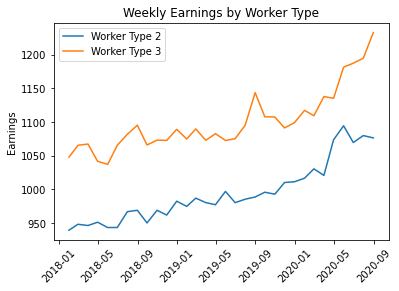

In [58]:
levels_worker = [2, 3]
fig, ax = plt.subplots(facecolor="w")
for level in levels_worker:
    type_worker_earnings = earnings_type_worker[earnings_type_worker["class_worker"] == level]
    ax.plot(dates, type_worker_earnings["EARNWEEK"], label=f"Worker Type {level}")
plt.legend()
plt.title("Weekly Earnings by Worker Type")
ax.set_ylabel("Earnings")
plt.xticks(rotation=45)

In [59]:
data[data["class_worker"]==1] # aparently for all the self-employed individuals the earnweek is not a valid variable

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,ASECWTH,PERNUM,WTFINL,CPSIDP,...,OCC,IND,CLASSWKR,AHRSWORKT,WHYUNEMP,EDUC,EARNWEEK,employed,educ_2,class_worker
4,2018,3,1,1797.0408,20180100000300,NaN,NaN,1,2053.2749,20180100000301,...,4920,7070,13,10,0,111,9999.99,1.0,3.0,1.0
21,2018,15,1,1861.2369,20161200000800,NaN,NaN,1,1557.3612,20161200000801,...,3010,7980,14,40,0,124,9999.99,1.0,4.0,1.0
34,2018,24,1,1609.4899,20161200002200,NaN,NaN,1,1420.7457,20161200002201,...,10,6890,14,32,0,123,9999.99,1.0,4.0,1.0
35,2018,24,1,1609.4899,20161200002200,NaN,NaN,2,1609.4899,20161200002202,...,430,6890,14,8,0,123,9999.99,1.0,4.0,1.0
54,2018,37,1,1509.2221,20161100004200,NaN,NaN,1,1509.2221,20161100004201,...,2100,7270,14,30,0,124,9999.99,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4250494,2020,68587,8,352.8678,20190806987700,NaN,NaN,1,352.8678,20190806987701,...,4540,8670,13,60,0,73,9999.99,1.0,2.0,1.0
4250495,2020,68587,8,352.8678,20190806987700,NaN,NaN,2,333.5796,20190806987702,...,205,180,13,60,0,73,9999.99,1.0,2.0,1.0
4250496,2020,68587,8,352.8678,20190806987700,NaN,NaN,3,414.0247,20190806987703,...,6260,770,13,25,0,81,9999.99,1.0,NaN,1.0
4250522,2020,68608,8,340.6211,20200706861600,NaN,NaN,1,340.6211,20200706861601,...,4710,8790,13,999,2,73,9999.99,0.0,2.0,1.0


# Telework

In [60]:
Data_2 = pd.read_csv("Data_2.txt")
Data_2.head()

,YEAR,CASEID,PERNUM,LINENO,WT06,OCC2_CPS8,IND2_CPS8,IND_CPS8,WRKHOMEABLE
0,2018,20180101180006,1,1,9.456372e+06,132,270,8660,99.0
1,2018,20180101180021,1,1,4.010486e+06,190,145,2170,99.0
2,2018,20180101180025,1,1,3.519394e+07,9999,9999,99999,99.0
3,2018,20180101180054,1,1,2.251398e+06,9999,9999,99999,99.0
4,2018,20180101180060,1,1,1.029459e+06,9999,9999,99999,0.0


In [61]:
Data_2.drop(Data_2[(Data_2["WRKHOMEABLE"] == 99)
                       | (Data_2["WRKHOMEABLE"] == 98)
                       | (Data_2["IND_CPS8"] == 9999)
                       | (Data_2["IND_CPS8"] == 99999)].index, inplace=True)
Data_2 = Data_2.dropna()
Data_2.head()

,YEAR,CASEID,PERNUM,LINENO,WT06,OCC2_CPS8,IND2_CPS8,IND_CPS8,WRKHOMEABLE
5,2018,20180101180087,1,1,7.057540e+06,130,251,8270,0.0
8,2018,20180101180145,1,1,3.904603e+06,150,251,8170,1.0
11,2018,20180101180507,1,1,6.838463e+06,140,131,2980,1.0
15,2018,20180101180532,1,1,3.834468e+06,110,220,7380,1.0
17,2018,20180101180549,1,1,6.950850e+06,111,9999,6672,1.0


In [62]:
a = Data_2.groupby("IND_CPS8")["WRKHOMEABLE"].sum()
a

IND_CPS8
170      3.0
180      4.0
190      2.0
270      2.0
290      1.0
        ... 
9470    22.0
9480    17.0
9490    11.0
9570    15.0
9590    11.0
Name: WRKHOMEABLE, Length: 238, dtype: float64

In [63]:
b = Data_2.groupby("IND_CPS8")["WRKHOMEABLE"].count()
b

IND_CPS8
170     15
180     17
190      2
270      4
290      4
        ..
9470    97
9480    42
9490    24
9570    27
9590    34
Name: WRKHOMEABLE, Length: 238, dtype: int64

In [64]:
#a = a.apply(lambda x: 100 * (x / a.sum()))

In [65]:
c=a/b
c

IND_CPS8
170     0.200000
180     0.235294
190     1.000000
270     0.500000
290     0.250000
          ...   
9470    0.226804
9480    0.404762
9490    0.458333
9570    0.555556
9590    0.323529
Name: WRKHOMEABLE, Length: 238, dtype: float64

In [66]:
c = c.sort_values()
c

IND_CPS8
4280    0.0
2890    0.0
1670    0.0
1880    0.0
5390    0.0
       ... 
190     1.0
1390    1.0
7880    1.0
6672    1.0
4265    1.0
Name: WRKHOMEABLE, Length: 238, dtype: float64

In [67]:
#c = c.cumsum()

In [68]:
tele_work_key = c.to_dict()
#teledict

In [69]:
Data_2["Index_TeleWork"] = Data_2["IND_CPS8"].map(tele_work_key)
Data_2.head()

,YEAR,CASEID,PERNUM,LINENO,WT06,OCC2_CPS8,IND2_CPS8,IND_CPS8,WRKHOMEABLE,Index_TeleWork
5,2018,20180101180087,1,1,7.057540e+06,130,251,8270,0.0,0.192982
8,2018,20180101180145,1,1,3.904603e+06,150,251,8170,1.0,0.283019
11,2018,20180101180507,1,1,6.838463e+06,140,131,2980,1.0,0.200000
15,2018,20180101180532,1,1,3.834468e+06,110,220,7380,1.0,0.852459
17,2018,20180101180549,1,1,6.950850e+06,111,9999,6672,1.0,1.000000


In [70]:
yes_telework = Data_2[Data_2["Index_TeleWork"] >= 0.50]
no_telework = Data_2[Data_2["Index_TeleWork"] < 0.50]
yes_telework["IND_CPS8"].keys

<bound method Series.keys of 15      7380
17      6672
18      7270
21      7280
49      4195
        ... 
9524    6670
9543    9160
9549    6990
9566    7870
9577    6990
Name: IND_CPS8, Length: 1288, dtype: int64>

In [71]:
te_keys = dict.fromkeys(yes_telework["IND_CPS8"], 1)
te_keys.update(dict.fromkeys(no_telework["IND_CPS8"], 0))
data["Telework_Yes"] = data["IND"].map(te_keys)
data.head(100)

,YEAR,SERIAL,MONTH,HWTFINL,CPSID,ASECFLAG,ASECWTH,PERNUM,WTFINL,CPSIDP,...,IND,CLASSWKR,AHRSWORKT,WHYUNEMP,EDUC,EARNWEEK,employed,educ_2,class_worker,Telework_Yes
0,2018,1,1,1490.5890,20161000000100,NaN,NaN,1,2158.9491,20161000000101,...,0,0,999,0,92,9999.99,NaN,NaN,NaN,NaN
1,2018,1,1,1490.5890,20161000000100,NaN,NaN,2,1490.5890,20161000000102,...,0,0,999,0,81,9999.99,NaN,NaN,NaN,NaN
2,2018,2,1,1609.4899,20161200000200,NaN,NaN,1,1420.7457,20161200000201,...,7580,22,55,0,81,9999.99,1.0,NaN,2.0,0.0
3,2018,2,1,1609.4899,20161200000200,NaN,NaN,2,1609.4899,20161200000202,...,0,0,999,0,81,9999.99,NaN,NaN,NaN,NaN
4,2018,3,1,1797.0408,20180100000300,NaN,NaN,1,2053.2749,20180100000301,...,7070,13,10,0,111,9999.99,1.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018,73,1,1781.0527,20171000007400,NaN,NaN,1,2067.3970,20171000007401,...,7460,22,40,0,111,1923.07,1.0,3.0,2.0,1.0
96,2018,73,1,1781.0527,20171000007400,NaN,NaN,2,1781.0527,20171000007402,...,8180,22,20,0,111,961.53,1.0,3.0,2.0,0.0
97,2018,73,1,1781.0527,20171000007400,NaN,NaN,3,3361.8631,20171000007403,...,0,0,999,0,1,9999.99,NaN,NaN,NaN,NaN
98,2018,73,1,1781.0527,20171000007400,NaN,NaN,4,2283.7345,20171000007404,...,0,0,999,0,1,9999.99,NaN,NaN,NaN,NaN


In [73]:
employment_rate_telework=data.groupby(["YEAR","MONTH","Telework_Yes"])["employed"].mean()
employment_rate_telework = employment_rate_telework.reset_index().drop(["YEAR", "MONTH"], axis=1)
employment_rate_telework.head()

,Telework_Yes,employed
0,0.0,0.956942
1,1.0,0.972542
2,0.0,0.957225
3,1.0,0.974727
4,0.0,0.959507


(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669.]),
 <a list of 9 Text major ticklabel objects>)

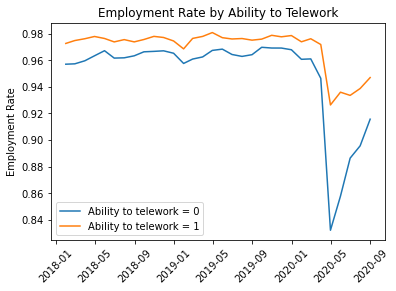

In [85]:
levels_tw = [0, 1]
fig, ax = plt.subplots(facecolor="w")
for levels in levels_tw:
    employment_tw = employment_rate_telework[employment_rate_telework["Telework_Yes"] == levels]
    ax.plot(dates, employment_tw["employed"], label=f"Ability to telework = {levels}")
plt.legend()
plt.title("Employment Rate by Ability to Telework")
ax.set_ylabel("Employment Rate")
plt.xticks(rotation=45)

In [81]:
av_hours_telework = data[data["AHRSWORKT"]<999].groupby(["YEAR", "MONTH", "Telework_Yes"])["AHRSWORKT"].mean()
av_hours_telework = av_hours_telework.reset_index().drop(["YEAR", "MONTH"], axis=1)
av_hours_telework.head()

,Telework_Yes,AHRSWORKT
0,0.0,37.971656
1,1.0,39.525577
2,0.0,38.251551
3,1.0,39.603378
4,0.0,38.312207


(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669.]),
 <a list of 9 Text major ticklabel objects>)

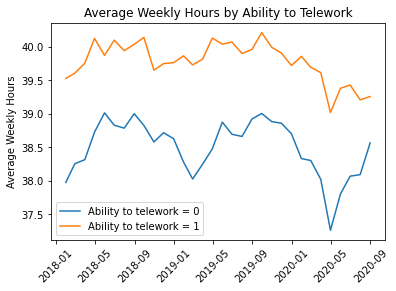

In [82]:
levels_tw = [0, 1]
fig, ax = plt.subplots(facecolor="w")
for levels in levels_tw:
    hours_tw = av_hours_telework[av_hours_telework["Telework_Yes"] == levels]
    ax.plot(dates, hours_tw["AHRSWORKT"], label=f"Ability to telework = {levels}")
plt.legend()
plt.title("Average Weekly Hours by Ability to Telework")
ax.set_ylabel("Average Weekly Hours")
plt.xticks(rotation=45)

In [83]:
av_earings_telework = data[data["EARNWEEK"]<9999.99].groupby(["YEAR", "MONTH", "Telework_Yes"])["EARNWEEK"].mean()
av_earings_telework = av_earings_telework.reset_index().drop(["YEAR", "MONTH"], axis=1)
av_earings_telework.head()

,Telework_Yes,EARNWEEK
0,0.0,874.063401
1,1.0,1248.653817
2,0.0,880.622442
3,1.0,1263.940358
4,0.0,874.570716


(array([736695., 736815., 736938., 737060., 737180., 737303., 737425.,
        737546., 737669.]),
 <a list of 9 Text major ticklabel objects>)

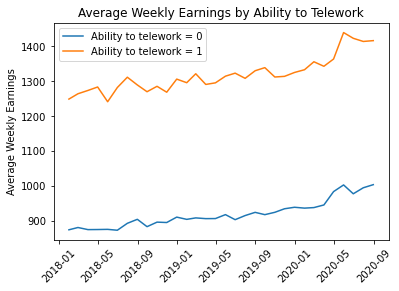

In [84]:
levels_tw = [0, 1]
fig, ax = plt.subplots(facecolor="w")
for levels in levels_tw:
    earings_tw = av_earings_telework[av_earings_telework["Telework_Yes"] == levels]
    ax.plot(dates, earings_tw["EARNWEEK"], label=f"Ability to telework = {levels}")
plt.legend()
plt.title("Average Weekly Earnings by Ability to Telework")
ax.set_ylabel("Average Weekly Earnings")
plt.xticks(rotation=45)

In [164]:
Data_ESP = pd.read_csv("Data_ESP.txt")
Data_ESP.head(30)

,TIME,GEO,SEX,AGE,CITIZEN,UNIT,Value,Flag and Footnotes
0,2018Q1,Spain,Total,From 15 to 64 years,Total,Percentage,61.1,NaN
1,2018Q2,Spain,Total,From 15 to 64 years,Total,Percentage,62.5,NaN
2,2018Q3,Spain,Total,From 15 to 64 years,Total,Percentage,63.0,NaN
3,2018Q4,Spain,Total,From 15 to 64 years,Total,Percentage,63.0,NaN
4,2019Q1,Spain,Total,From 15 to 64 years,Total,Percentage,62.5,NaN
5,2019Q2,Spain,Total,From 15 to 64 years,Total,Percentage,63.5,NaN
6,2019Q3,Spain,Total,From 15 to 64 years,Total,Percentage,63.5,NaN
7,2019Q4,Spain,Total,From 15 to 64 years,Total,Percentage,63.7,NaN
8,2020Q1,Spain,Total,From 15 to 64 years,Total,Percentage,62.6,NaN
9,2020Q2,Spain,Total,From 15 to 64 years,Total,Percentage,59.1,NaN


In [165]:
Data_ESP["TRIM"]=[1,2,3,4,1,2,3,4,1,2] 
Data_ESP["YEAR"]=[2018,2018,2018,2018,2019,2019,2019,2019,2020,2020] 
Data_ESP

,TIME,GEO,SEX,AGE,CITIZEN,UNIT,Value,Flag and Footnotes,TRIM,YEAR
0,2018Q1,Spain,Total,From 15 to 64 years,Total,Percentage,61.1,NaN,1,2018
1,2018Q2,Spain,Total,From 15 to 64 years,Total,Percentage,62.5,NaN,2,2018
2,2018Q3,Spain,Total,From 15 to 64 years,Total,Percentage,63.0,NaN,3,2018
3,2018Q4,Spain,Total,From 15 to 64 years,Total,Percentage,63.0,NaN,4,2018
4,2019Q1,Spain,Total,From 15 to 64 years,Total,Percentage,62.5,NaN,1,2019
5,2019Q2,Spain,Total,From 15 to 64 years,Total,Percentage,63.5,NaN,2,2019
6,2019Q3,Spain,Total,From 15 to 64 years,Total,Percentage,63.5,NaN,3,2019
7,2019Q4,Spain,Total,From 15 to 64 years,Total,Percentage,63.7,NaN,4,2019
8,2020Q1,Spain,Total,From 15 to 64 years,Total,Percentage,62.6,NaN,1,2020
9,2020Q2,Spain,Total,From 15 to 64 years,Total,Percentage,59.1,NaN,2,2020


In [166]:
trim_dummies=pd.get_dummies(Data_ESP['TRIM'])
trim_dummies

,1,2,3,4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [167]:
employment_rate_esp=Data_ESP.groupby(["YEAR","TRIM"])["Value"].mean()
employment_rate_esp=employment_rate_esp.reset_index().drop(["YEAR", "TRIM"], axis=1)
employment_rate_esp.head(12)

,Value
0,61.1
1,62.5
2,63.0
3,63.0
4,62.5
5,63.5
6,63.5
7,63.7
8,62.6
9,59.1


In [168]:
dates_esp=Data_ESP["TIME"]
dates_esp

0    2018Q1
1    2018Q2
2    2018Q3
3    2018Q4
4    2019Q1
5    2019Q2
6    2019Q3
7    2019Q4
8    2020Q1
9    2020Q2
Name: TIME, dtype: object

In [169]:
model_esp = LinearRegression()
model_esp.fit(trim_dummies[:-2], employment_rate_esp['Value'][:-2])
predictions_esp = model_esp.predict(trim_dummies[-2:])
predictions_esp

array([61.8, 63. ])

In [170]:
predictions_esp = employment_rate_esp["Value"][:-2]
predictions_esp = pd.concat([predictions_esp, pd.Series(predictions_esp)])
predictions_esp =predictions_esp.reset_index()
predictions_esp = predictions_esp.drop(["index"], axis = 1)
predictions_esp["Date"]= dates_esp
predictions_esp

,Value,Date
0,61.1,2018Q1
1,62.5,2018Q2
2,63.0,2018Q3
3,63.0,2018Q4
4,62.5,2019Q1
5,63.5,2019Q2
6,63.5,2019Q3
7,63.7,2019Q4
8,61.1,2020Q1
9,62.5,2020Q2


In [171]:
predictions_esp=predictions_esp[:-6]
predictions_esp = predictions_esp.set_index("Date")
predictions_esp

<function matplotlib.pyplot.show(*args, **kw)>

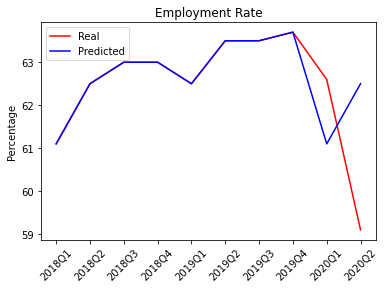

In [174]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates_esp, employment_rate_esp, "r", label="Real")
ax.plot(dates_esp, predictions_esp, "b", label="Predicted")
plt.title("Employment Rate")
ax.set_ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend()
plt.show

In [252]:
Data_ESP2 = pd.read_csv("Data_ESP2.txt")
Data_ESP2.head(32)

,TIME,GEO,SEX,AGE,ISCED11,UNIT,Value,Flag and Footnotes
0,2018Q1,Spain,Total,From 15 to 64 years,"Less than primary, primary and lower secondary...",Percentage,49.7,NaN
1,2018Q1,Spain,Total,From 15 to 64 years,Upper secondary and post-secondary non-tertiar...,Percentage,59.0,NaN
2,2018Q1,Spain,Total,From 15 to 64 years,Tertiary education (levels 5-8),Percentage,79.7,NaN
3,2018Q2,Spain,Total,From 15 to 64 years,"Less than primary, primary and lower secondary...",Percentage,51.4,NaN
4,2018Q2,Spain,Total,From 15 to 64 years,Upper secondary and post-secondary non-tertiar...,Percentage,60.6,NaN
5,2018Q2,Spain,Total,From 15 to 64 years,Tertiary education (levels 5-8),Percentage,80.6,NaN
6,2018Q3,Spain,Total,From 15 to 64 years,"Less than primary, primary and lower secondary...",Percentage,52.0,NaN
7,2018Q3,Spain,Total,From 15 to 64 years,Upper secondary and post-secondary non-tertiar...,Percentage,61.5,NaN
8,2018Q3,Spain,Total,From 15 to 64 years,Tertiary education (levels 5-8),Percentage,79.9,NaN
9,2018Q4,Spain,Total,From 15 to 64 years,"Less than primary, primary and lower secondary...",Percentage,51.8,NaN


In [254]:
Data_ESP2["TRIM"]=[1,1,1,2,2,2,3,3,3,4,4,4,1,1,1,2,2,2,3,3,3,4,4,4,1,1,1,2,2,2] 
Data_ESP2["YEAR"]=[2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2020,2020,2020,2020,2020,2020] 
Data_ESP2.head(32)

,TIME,GEO,SEX,AGE,ISCED11,UNIT,Value,Flag and Footnotes,TRIM,YEAR
0,2018Q1,Spain,Total,From 15 to 64 years,"Less than primary, primary and lower secondary...",Percentage,49.7,NaN,1,2018
1,2018Q1,Spain,Total,From 15 to 64 years,Upper secondary and post-secondary non-tertiar...,Percentage,59.0,NaN,1,2018
2,2018Q1,Spain,Total,From 15 to 64 years,Tertiary education (levels 5-8),Percentage,79.7,NaN,1,2018
3,2018Q2,Spain,Total,From 15 to 64 years,"Less than primary, primary and lower secondary...",Percentage,51.4,NaN,2,2018
4,2018Q2,Spain,Total,From 15 to 64 years,Upper secondary and post-secondary non-tertiar...,Percentage,60.6,NaN,2,2018
5,2018Q2,Spain,Total,From 15 to 64 years,Tertiary education (levels 5-8),Percentage,80.6,NaN,2,2018
6,2018Q3,Spain,Total,From 15 to 64 years,"Less than primary, primary and lower secondary...",Percentage,52.0,NaN,3,2018
7,2018Q3,Spain,Total,From 15 to 64 years,Upper secondary and post-secondary non-tertiar...,Percentage,61.5,NaN,3,2018
8,2018Q3,Spain,Total,From 15 to 64 years,Tertiary education (levels 5-8),Percentage,79.9,NaN,3,2018
9,2018Q4,Spain,Total,From 15 to 64 years,"Less than primary, primary and lower secondary...",Percentage,51.8,NaN,4,2018


In [258]:
employment_rate_esp_educ=Data_ESP2.groupby(["YEAR","TRIM","ISCED11"])["Value"].mean()
employment_rate_esp_educ=employment_rate_esp_educ.reset_index().drop(["YEAR", "TRIM"], axis=1)
employment_rate_esp_educ["level_educ"]=[1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2,1,3,2]
employment_rate_esp_educ.head(32)

,ISCED11,Value,level_educ
0,"Less than primary, primary and lower secondary...",49.7,1
1,Tertiary education (levels 5-8),79.7,3
2,Upper secondary and post-secondary non-tertiar...,59.0,2
3,"Less than primary, primary and lower secondary...",51.4,1
4,Tertiary education (levels 5-8),80.6,3
5,Upper secondary and post-secondary non-tertiar...,60.6,2
6,"Less than primary, primary and lower secondary...",52.0,1
7,Tertiary education (levels 5-8),79.9,3
8,Upper secondary and post-secondary non-tertiar...,61.5,2
9,"Less than primary, primary and lower secondary...",51.8,1


In [259]:
dates_esp2=Data_ESP2["TIME"]
dates_esp2

0     2018Q1
1     2018Q1
2     2018Q1
3     2018Q2
4     2018Q2
5     2018Q2
6     2018Q3
7     2018Q3
8     2018Q3
9     2018Q4
10    2018Q4
11    2018Q4
12    2019Q1
13    2019Q1
14    2019Q1
15    2019Q2
16    2019Q2
17    2019Q2
18    2019Q3
19    2019Q3
20    2019Q3
21    2019Q4
22    2019Q4
23    2019Q4
24    2020Q1
25    2020Q1
26    2020Q1
27    2020Q2
28    2020Q2
29    2020Q2
Name: TIME, dtype: object

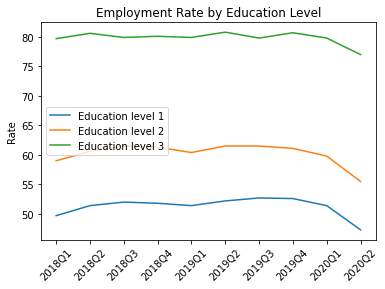

In [260]:
levels_esp = [1, 2, 3]
fig, ax = plt.subplots(facecolor="w")
for level in levels_esp:
    edu_level_esp = employment_rate_esp_educ[employment_rate_esp_educ["level_educ"] == level]
    ax.plot(dates_esp, edu_level_esp["Value"], label=f"Education level {level}")
plt.xticks(rotation=45)
ax.set_ylabel("Rate")
plt.title("Employment Rate by Education Level")
plt.legend(loc=6)
plt.show()

In [224]:
ESP_HOURS=pd.read_excel("HORAS_ESP.xlsx")
ESP_HOURS

,AÑO,TRIM,HORAS,OCUPADOS,AV_HORAS
0,2018,1,615140.5,18874.2,32.591607
1,2018,2,646371.0,19344.1,33.414374
2,2018,3,587829.1,19528.0,30.101859
3,2018,4,628650.0,19564.6,32.132014
4,2019,1,638565.7,19471.1,32.795564
5,2019,2,646348.3,19804.9,32.635777
6,2019,3,588451.9,19874.3,29.608686
7,2019,4,639961.6,19966.9,32.051125
8,2020,1,612752.8,19681.3,31.133756
9,2020,2,474306.8,18607.2,25.490498


In [230]:
av_hours=ESP_HOURS['AV_HORAS']

In [225]:
model_esp_hours = LinearRegression()
model_esp_hours.fit(trim_dummies[:-2], ESP_HOURS['AV_HORAS'][:-2])
predictions_esp_hours = model_esp_hours.predict(trim_dummies[-2:])
predictions_esp_hours

array([32.69358511, 33.02507571])

In [229]:
predictions_esp_hours = ESP_HOURS["AV_HORAS"][:-2]
predictions_esp_hours = pd.concat([predictions_esp_hours, pd.Series(predictions_esp_hours)])
predictions_esp_hours =predictions_esp_hours.reset_index()
predictions_esp_hours = predictions_esp_hours.drop(["index"], axis = 1)
predictions_esp_hours["Date"]= dates_esp
predictions_esp_hours

,AV_HORAS,Date
0,32.591607,2018Q1
1,33.414374,2018Q2
2,30.101859,2018Q3
3,32.132014,2018Q4
4,32.795564,2019Q1
5,32.635777,2019Q2
6,29.608686,2019Q3
7,32.051125,2019Q4
8,32.591607,2020Q1
9,33.414374,2020Q2


In [232]:
predictions_esp_hours=predictions_esp_hours[:-6]
predictions_esp_hours = predictions_esp_hours.set_index("Date")
predictions_esp_hours

,AV_HORAS
Date,
2018Q1,32.591607
2018Q2,33.414374
2018Q3,30.101859
2018Q4,32.132014
2019Q1,32.795564
2019Q2,32.635777
2019Q3,29.608686
2019Q4,32.051125
2020Q1,32.591607


<function matplotlib.pyplot.show(*args, **kw)>

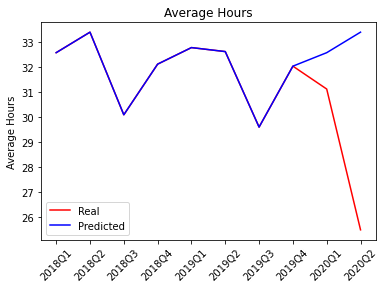

In [233]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates_esp, av_hours, "r", label="Real")
ax.plot(dates_esp, predictions_esp_hours, "b", label="Predicted")
plt.title("Average Hours")
ax.set_ylabel("Average Hours")
plt.xticks(rotation=45)
plt.legend()
plt.show

In [234]:
ESP_WAGE=pd.read_excel("WAGE_ESP.xlsx")
ESP_WAGE

,AÑO,TRIM,AV_WAGE
0,2018,1,2497.91
1,2018,2,2602.01
2,2018,3,2499.87
3,2018,4,2692.52
4,2019,1,2550.27
5,2019,2,2664.55
6,2019,3,2553.62
7,2019,4,2755.15
8,2020,1,2570.32
9,2020,2,2442.91


In [239]:
av_wage=ESP_WAGE['AV_WAGE']

In [235]:
model_esp_wage = LinearRegression()
model_esp_wage.fit(trim_dummies[:-2], ESP_WAGE['AV_WAGE'][:-2])
predictions_esp_wage = model_esp_wage.predict(trim_dummies[-2:])
predictions_esp_wage

array([2524.09, 2633.28])

In [236]:
predictions_esp_wage = ESP_WAGE["AV_WAGE"][:-2]
predictions_esp_wage = pd.concat([predictions_esp_wage, pd.Series(predictions_esp_wage)])
predictions_esp_wage =predictions_esp_wage.reset_index()
predictions_esp_wage = predictions_esp_wage.drop(["index"], axis = 1)
predictions_esp_wage["Date"]= dates_esp
predictions_esp_wage

,AV_WAGE,Date
0,2497.91,2018Q1
1,2602.01,2018Q2
2,2499.87,2018Q3
3,2692.52,2018Q4
4,2550.27,2019Q1
5,2664.55,2019Q2
6,2553.62,2019Q3
7,2755.15,2019Q4
8,2497.91,2020Q1
9,2602.01,2020Q2


In [237]:
predictions_esp_wage=predictions_esp_wage[:-6]
predictions_esp_wage = predictions_esp_wage.set_index("Date")
predictions_esp_wage

,AV_WAGE
Date,
2018Q1,2497.91
2018Q2,2602.01
2018Q3,2499.87
2018Q4,2692.52
2019Q1,2550.27
2019Q2,2664.55
2019Q3,2553.62
2019Q4,2755.15
2020Q1,2497.91


<function matplotlib.pyplot.show(*args, **kw)>

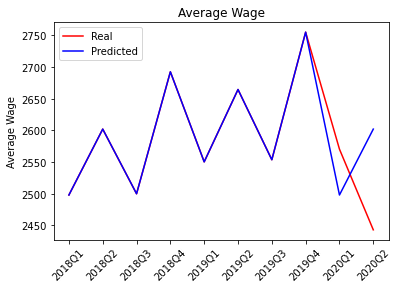

In [240]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(dates_esp, av_wage, "r", label="Real")
ax.plot(dates_esp, predictions_esp_wage, "b", label="Predicted")
plt.title("Average Wage")
ax.set_ylabel("Average Wage")
plt.xticks(rotation=45)
plt.legend()
plt.show

In [ ]:
print("Program finished running")